In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
linkTrain = 'https://drive.google.com/file/d/1uV8qsVnl1XLxLlfw2tnGF3rbIU3tntHI/view?usp=sharing'
linkIdTrain = '1uV8qsVnl1XLxLlfw2tnGF3rbIU3tntHI'

linkTest = 'https://drive.google.com/file/d/1QIJWtK99SblVQK88AHqHwAVBZJcT14yW/view?usp=sharing'
LinkIdTest = '1QIJWtK99SblVQK88AHqHwAVBZJcT14yW'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
downloaded = drive.CreateFile({'id':linkIdTrain}) 
downloaded.GetContentFile('Bot_IOT_Train.csv')  

downloaded = drive.CreateFile({'id':LinkIdTest}) 
downloaded.GetContentFile('Bot_IOT_Test.csv')  

#loading data
df_GB_Train = pd.read_csv('Bot_IOT_Train.csv')
df_GB_Test = pd.read_csv('Bot_IOT_Test.csv')

In [ ]:
#Data preprocessing
#checking for NULL Values for training
null_columns = df_GB_Train.columns[df_GB_Train.isnull().any()]
df_GB_Train[null_columns].isnull().sum()

#for testing
null_columns = df_GB_Test.columns[df_GB_Test.isnull().any()]
df_GB_Test[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
#ignoring non important attributes from dataset
#training
df_GB_Train=df_GB_Train.drop(['pkSeqID', 'saddr', 'sport', 'daddr', 'dport', 'proto'], axis = 1)

#for testing
df_GB_Test=df_GB_Test.drop(['pkSeqID', 'saddr', 'sport', 'daddr', 'dport', 'proto'], axis = 1)

In [ ]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#dependent and independent variables
X_Train = df_GB_Train.iloc[:, 0:10]
Y_Train = df_GB_Train.loc[:, 'attack']


X_Test = df_GB_Test.iloc[: , 0:10]
Y_Test = df_GB_Test.loc[:,'attack']

print(X_Train.shape)
print(Y_Train.shape)
print(X_Test.shape)
print(Y_Test.shape)

(2934817, 10)
(2934817,)
(733705, 10)
(733705,)


In [ ]:
rate = [0.25,0.5,0.75]
for i in rate:
  model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate = i, random_state = 0)
  model_gb.fit(X_Train, Y_Train)
  y_pred = model_gb.predict(X_Test)
  accuracy = accuracy_score(Y_Test,y_pred)*100
  print("accuracy : " , accuracy)


accuracy :  99.88414962416775
accuracy :  99.98173652898645
accuracy :  99.99114085361282


In [ ]:
# Classifier
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.75, random_state = 0)

In [ ]:
model_gb.fit(X_Train, Y_Train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.75, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#predicting
y_pred = model_gb.predict(X_Test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#model evaluation
accuracy = accuracy_score(Y_Test,y_pred)*100
accuracy

99.98391724194329

In [ ]:
#confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_Test, y_pred))

Confusion Matrix:
[[    53     54]
 [    64 733534]]


In [ ]:
print("Classification Report")
print(classification_report(Y_Test, y_pred))


Classification Report
              precision    recall  f1-score   support

           0       0.45      0.50      0.47       107
           1       1.00      1.00      1.00    733598

    accuracy                           1.00    733705
   macro avg       0.73      0.75      0.74    733705
weighted avg       1.00      1.00      1.00    733705



In [ ]:
####################predicting category attribute
#encoding category and subcategory
from sklearn import preprocessing
lableEnc = preprocessing.LabelEncoder()

print(df_GB_Test['category'].unique())
print(df_GB_Train['category'].unique())

['DoS' 'DDoS' 'Reconnaissance' 'Normal' 'Theft']
['DDoS' 'DoS' 'Reconnaissance' 'Normal' 'Theft']


In [ ]:
#encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le1 = LabelEncoder()
df_GB_Train['category']=le.fit_transform(df_GB_Train['category'])
df_GB_Train['subcategory']=le1.fit_transform(df_GB_Train['subcategory'])

df_GB_Test['category']=le.transform(df_GB_Test['category'])
df_GB_Test['subcategory']=le1.transform(df_GB_Test['subcategory'])


In [ ]:
print(df_GB_Test['category'].unique())
print(df_GB_Train['category'].unique())

[1 0 3 2 4]
[0 1 3 2 4]


In [ ]:
#dependent and independent variables
X_cat_train = df_GB_Train.iloc[:, 0:11]
Y_cat_train = df_GB_Train.loc[:, 'category']

X_cat_test =df_GB_Test.iloc[:, 0:10]
X_cat_test['attack']= y_pred
Y_cat_test=df_GB_Test.loc[:, 'category']

print(X_cat_train)
print(Y_cat_train)

            seq    stddev  N_IN_Conn_P_SrcIP  ...     srate       max  attack
0        251984  1.900363                100  ...  0.494549  4.031619       1
1        256724  0.078003                 38  ...  0.256493  4.012924       1
2         62921  0.268666                100  ...  0.294880  3.609205       1
3         99168  1.823185                 63  ...  0.461435  4.942302       1
4        105063  0.822418                100  ...  1.002999  4.994452       1
...         ...       ...                ...  ...       ...       ...     ...
2934812  253370  0.016992                100  ...  0.243473  4.124047       1
2934813  231693  1.922317                100  ...  0.490800  4.090534       1
2934814  158616  2.112228                100  ...  0.207444  4.332615       1
2934815  179855  0.000000                100  ...  0.162130  0.000000       1
2934816   95429  0.053820                100  ...  0.116388  0.172408       1

[2934817 rows x 11 columns]
0          0
1          0
2        

In [ ]:
#classifier
model_gb_cat = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.75, random_state = 0)
model_gb_cat.fit(X_cat_train, Y_cat_train) 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#calcuating accuracy of the model on test set
pred_cat = model_gb_cat.predict(X_cat_test)

#calculate accuracy
print("Accuracy Score: ")
print (accuracy_score(Y_cat_test, pred_cat)*100)

#confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_cat_test, pred_cat))

#classification report
print("Classification Report")
print(classification_report(Y_cat_test, pred_cat))

Accuracy Score: 
99.13412066157379
Confusion Matrix:
[[380623   4636     15     24     11]
 [  1441 328624     19     12     16]
 [     0     11     53     43      0]
 [    54     34     28  18038      9]
 [     0      0      0      0     14]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    385309
           1       0.99      1.00      0.99    330112
           2       0.46      0.50      0.48       107
           3       1.00      0.99      0.99     18163
           4       0.28      1.00      0.44        14

    accuracy                           0.99    733705
   macro avg       0.74      0.89      0.78    733705
weighted avg       0.99      0.99      0.99    733705



In [ ]:
####################Predicting subcategory of attack
#dependent and independent variables
X_subcat_train = df_GB_Train.iloc[:, 0:12]
Y_subcat_train = df_GB_Train.loc[:, 'subcategory']

X_subcat_test =df_GB_Test.iloc[:, 0:10]

X_subcat_test['attack']= y_pred
X_subcat_test['category']= pred_cat
Y_subcat_test=df_GB_Test.loc[:, 'subcategory']

In [ ]:
#classifying
model_gb_subcat = kNeiClassifier(n_estimators=10, learning_rate = 0.5, random_state = 0)
model_gb_subcat.fit(X_subcat_train, Y_subcat_train) 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#calcuating accuracy of the model on test set
pred_subcat = model_gb_subcat.predict(X_subcat_test)

#calculate accuracy
print("Accuracy Score: ")
print (accuracy_score(Y_subcat_test, pred_subcat)*100)

#confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_subcat_test, pred_subcat))



Accuracy Score: 
97.92450644332531
Confusion Matrix:
[[     0      0      0     16    378    110      0]
 [     0      0      0     14      0      0      0]
 [     0      0     45      5     38      8     11]
 [     1      0      6   3529     49     23     13]
 [     1      0     19  11615   2768    131      8]
 [     0      0      3     19    413 317902      0]
 [   310      0     20      3      8   2006 394233]]


In [ ]:
#df['attack', 'category', 'subcategory']
a=df_GB_Test['attack']
b=df_GB_Test['category']
c=df_GB_Test['subcategory']
count=0
for i in range(0,len(df_GB_Test)):
  if(y_pred[i]==a[i]) and (pred_cat[i]==b[i]) and (pred_subcat[i]==c[i]):
    count=count+1
count
count/len(df_GB_Test)*100

97.12268554800634

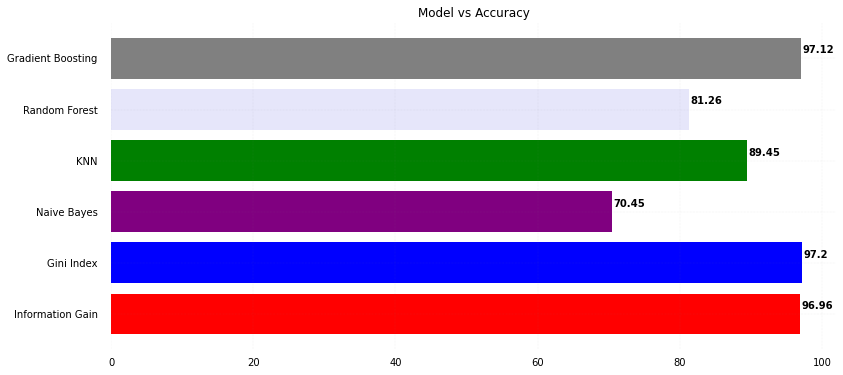

In [ ]:
from matplotlib import pyplot as plt

accuracy = [96.96 , 97.200, 70.45, 89.45 , 81.26, 97.12]
model = ['Information Gain', 'Gini Index','Naive Bayes',  'KNN','Random Forest', 'Gradient Boosting']

# Figure Size
fig, ax = plt.subplots(figsize =(13, 6))

# Horizontal Bar Plot
ax.barh(model, accuracy , color=['red', 'blue', 'purple', 'green', 'lavender' , 'grey'])

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.3,
		alpha = 0.2)

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 3)),
			fontsize = 10, fontweight ='bold',
			color ='Black')

# Add Plot Title
ax.set_title('Model vs Accuracy')

# Show Plot
plt.show()